<a href="https://colab.research.google.com/github/Dipesh0987/draft/blob/main/DraftR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Task 1: Exploratory Data Analysis and Data Understanding
# ## 1.1 Choosing a Dataset

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/04232015altfuelstations.csv')

print("Dataset loaded successfully")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded successfully
Shape: 20329 rows, 38 columns


 ## Dataset Description

**(a) When and by whom the dataset was created:**

The Alternative Fuel Stations dataset was created and is maintained by the U.S. Department of Energy (DOE), specifically by the Alternative Fuels Data Center (AFDC) under the Office of Energy Efficiency and Renewable Energy (EERE). This particular snapshot was created on April 23, 2015, as indicated by the filename.

**(b) How and from where the dataset was accessed:**

The dataset was accessed from the Alternative Fuels Data Center website at https://afdc.energy.gov/fuels/data_download.html. It is publicly available as a CSV file containing information about alternative fueling stations across the United States.

**(c) How it aligns with the chosen UNSDG:**

This dataset aligns with UNSDG 7: Affordable and Clean Energy. It supports the goal by:
- Tracking infrastructure for clean energy adoption in transportation
- Promoting transition from fossil fuels to renewable energy sources
- Supporting sustainable transportation infrastructure development
- Reducing greenhouse gas emissions from the transportation sector

The dataset also has secondary alignment with UNSDG 11 (Sustainable Cities and Communities) and UNSDG 13 (Climate Action).


In [3]:
print("Dataset Attributes:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Dataset Attributes:
1. Fuel Type Code
2. Station Name
3. Street Address
4. Intersection Directions
5. City
6. State
7. ZIP
8. Plus4
9. Station Phone
10. Status Code
11. Expected Date
12. Groups With Access Code
13. Access Days Time
14. Cards Accepted
15. BD Blends
16. NG Fill Type Code
17. NG PSI
18. EV Level1 EVSE Num
19. EV Level2 EVSE Num
20. EV DC Fast Count
21. EV Other Info
22. EV Network
23. EV Network Web
24. Geocode Status
25. Latitude
26. Longitude
27. Date Last Confirmed
28. ID
29. Updated At
30. Owner Type Code
31. Federal Agency ID
32. Federal Agency Name
33. Open Date
34. Hydrogen Status Link
35. NG Vehicle Class
36. LPG Primary
37. E85 Blender Pump
38. EV Connector Types


In [4]:
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100

print("Dataset Quality Metrics:")
print(f"Total records: {df.shape[0]:,}")
print(f"Total features: {df.shape[1]}")
print(f"Missing values: {missing_cells:,}")
print(f"Data completeness: {completeness:.2f}%")
print(f"\nRelevance: High - directly addresses clean energy infrastructure")
print(f"Quality: Good - maintained by official government source")
print(f"Suitability for regression: Yes - contains numeric targets and diverse features")

Dataset Quality Metrics:
Total records: 20,329
Total features: 38
Missing values: 364,293
Data completeness: 52.84%

Relevance: High - directly addresses clean energy infrastructure
Quality: Good - maintained by official government source
Suitability for regression: Yes - contains numeric targets and diverse features


## 1.2 Exploratory Data Analysis

In [5]:
# Display first few rows
print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nData types:")
print(df.dtypes)

# Basic information
print("\nDataset Info:")
df.info()


First 5 rows:
  Fuel Type Code                         Station Name    Street Address  \
0            LPG                        Irish Propane   70 Katherine St   
1           ELEC                            Latitudes  2401 Highway 528   
2           ELEC         American Bush - Solar Canopy      2630 S 300 W   
3           ELEC  McDonald's #31850 - Flower Mound TX       3601 FM 407   
4           ELEC                      CITY OF SEATTLE       600 Pine St   

          Intersection Directions            City State    ZIP  Plus4  \
0           At Bailey and Clinton         Buffalo    NY  14210    NaN   
1                             NaN      Rio Rancho    NM  87124    NaN   
2  Located across from Tire World  Salt Lake City    UT  84115    NaN   
3                             NaN    Flower Mound    TX  75028    NaN   
4                             NaN         Seattle    WA  98101    NaN   

  Station Phone Status Code  ...               Updated At Owner Type Code  \
0  716-852-3335    

### Missing Values Analysis

Top 15 columns with missing values:
                         Missing_Count  Percentage
Plus4                            20329  100.000000
Hydrogen Status Link             20324   99.975405
EV Other Info                    20171   99.222785
Expected Date                    19868   97.732304
Federal Agency Name              19804   97.417482
Federal Agency ID                19804   97.417482
BD Blends                        19547   96.153279
EV DC Fast Count                 19396   95.410497
NG PSI                           18622   91.603129
NG Fill Type Code                18620   91.593290
EV Level1 EVSE Num               18465   90.830833
NG Vehicle Class                 18414   90.579960
E85 Blender Pump                 17372   85.454277
LPG Primary                      17219   84.701658
Intersection Directions          15970   78.557725


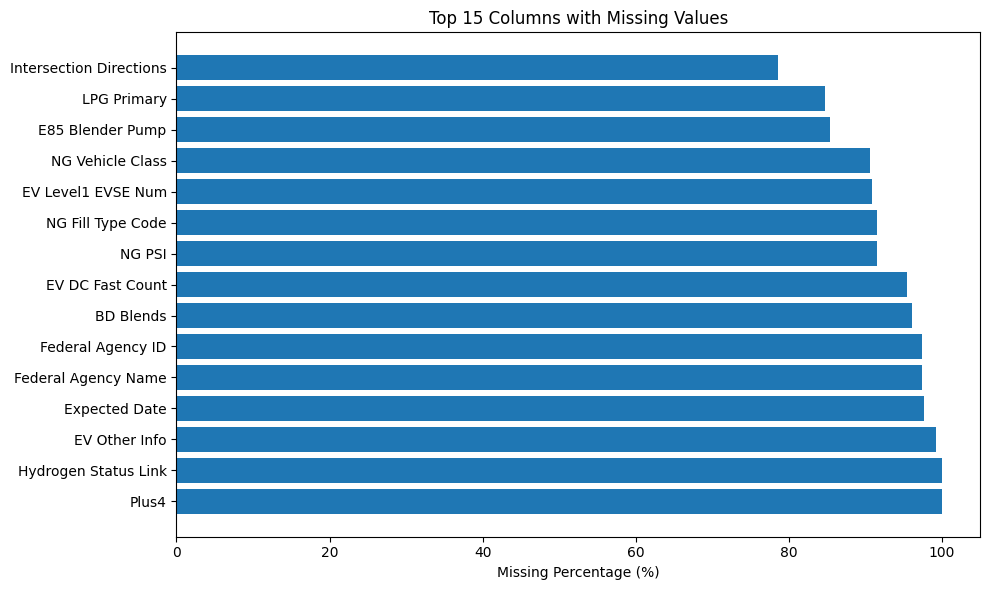

In [6]:
import matplotlib.pyplot as plt

# Calculate missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Percentage': missing_percentage
}).sort_values('Percentage', ascending=False)

print("Top 15 columns with missing values:")
print(missing_df.head(15))

# Visualize missing values
plt.figure(figsize=(10, 6))
top_missing = missing_df[missing_df['Missing_Count'] > 0].head(15)
plt.barh(range(len(top_missing)), top_missing['Percentage'])
plt.yticks(range(len(top_missing)), top_missing.index)
plt.xlabel('Missing Percentage (%)')
plt.title('Top 15 Columns with Missing Values')
plt.tight_layout()
plt.show()

In [7]:
# Numeric columns summary
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Summary statistics for numeric columns:")
print(df[numeric_cols].describe())

Summary statistics for numeric columns:
                ZIP  Plus4  EV Level1 EVSE Num  EV Level2 EVSE Num  \
count  20329.000000    0.0         1864.000000        10618.000000   
mean   58100.843180    NaN            2.119099            2.094933   
std    29654.180387    NaN            3.565924            2.388994   
min     1002.000000    NaN            1.000000            1.000000   
25%    32804.000000    NaN            1.000000            1.000000   
50%    59701.000000    NaN            1.000000            2.000000   
75%    87506.000000    NaN            2.000000            2.000000   
max    99929.000000    NaN           67.000000           76.000000   

       EV DC Fast Count      Latitude     Longitude            ID  \
count        933.000000  20329.000000  20329.000000  20329.000000   
mean           2.234727     37.897462    -96.265299  46065.396035   
std            2.151852      5.189500     17.740017  14796.461972   
min            1.000000     19.609150   -159.475426  

### Categorical Variables Analysis

In [8]:
# Analyze key categorical columns
categorical_cols = ['Fuel Type Code', 'State', 'Status Code', 'Groups With Access Code']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"Unique values: {df[col].nunique()}")
        print(f"Top 5 values:\n{df[col].value_counts().head()}")



Fuel Type Code:
Unique values: 7
Top 5 values:
Fuel Type Code
ELEC    11451
LPG      3110
E85      2957
CNG      1753
BD        783
Name: count, dtype: int64

State:
Unique values: 51
Top 5 values:
State
CA    3395
TX    1487
NY     850
IL     849
FL     815
Name: count, dtype: int64

Status Code:
Unique values: 3
Top 5 values:
Status Code
E    19775
P      462
T       92
Name: count, dtype: int64

Groups With Access Code:
Unique values: 25
Top 5 values:
Groups With Access Code
Public                               11842
Private                               2775
Public - Call ahead                   2011
Public - Credit card at all times      981
Private - Government only              815
Name: count, dtype: int64


### Data Visualizations

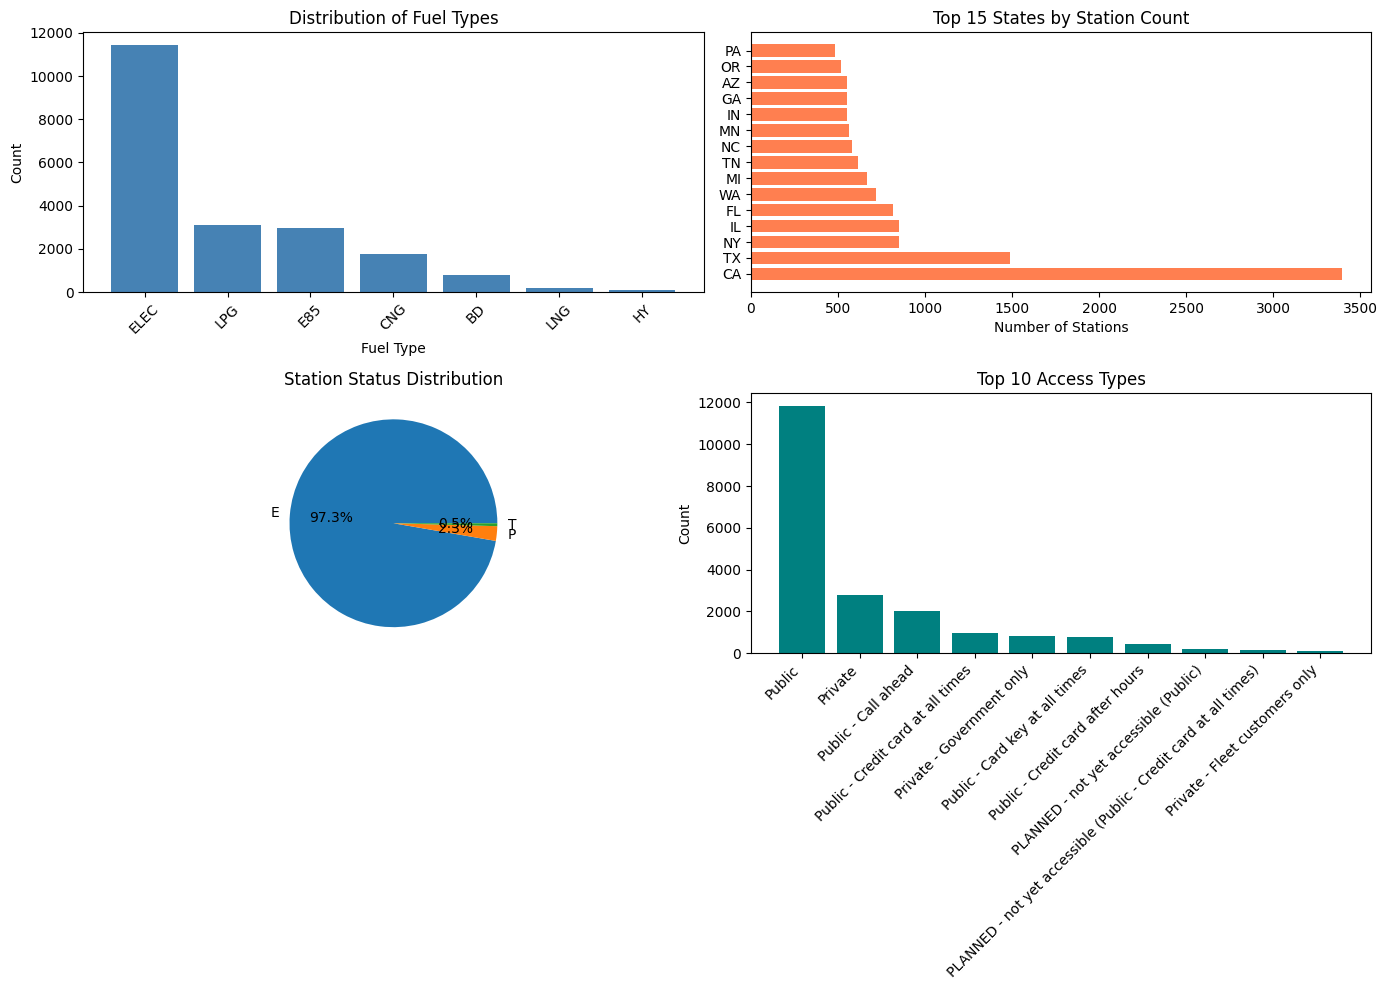

In [9]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Fuel Type Distribution
fuel_counts = df['Fuel Type Code'].value_counts()
axes[0, 0].bar(fuel_counts.index, fuel_counts.values, color='steelblue')
axes[0, 0].set_title('Distribution of Fuel Types')
axes[0, 0].set_xlabel('Fuel Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Top 15 States
state_counts = df['State'].value_counts().head(15)
axes[0, 1].barh(range(len(state_counts)), state_counts.values, color='coral')
axes[0, 1].set_yticks(range(len(state_counts)))
axes[0, 1].set_yticklabels(state_counts.index)
axes[0, 1].set_xlabel('Number of Stations')
axes[0, 1].set_title('Top 15 States by Station Count')

# Status Distribution
status_counts = df['Status Code'].value_counts()
axes[1, 0].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title('Station Status Distribution')

# Access Type
access_counts = df['Groups With Access Code'].value_counts().head(10)
axes[1, 1].bar(range(len(access_counts)), access_counts.values, color='teal')
axes[1, 1].set_xticks(range(len(access_counts)))
axes[1, 1].set_xticklabels(access_counts.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Top 10 Access Types')

plt.tight_layout()
plt.show()


# Task 2: Build a Neural Network Model for Regression

## 2.1 Data Preparation for Neural Network

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Create working copy
df_nn = df.copy()

# Define target variable: Total EV Charging Capacity
df_nn['Total_EVSE'] = (
    df_nn['EV Level1 EVSE Num'].fillna(0) +
    df_nn['EV Level2 EVSE Num'].fillna(0) * 2 +
    df_nn['EV DC Fast Count'].fillna(0) * 3
)

# Filter to stations with EV charging capacity
df_nn = df_nn[df_nn['Total_EVSE'] > 0].copy()

print(f"Records with EV charging capacity: {len(df_nn):,}")
print(f"Target variable: Total_EVSE")
print(f"Target range: {df_nn['Total_EVSE'].min():.0f} to {df_nn['Total_EVSE'].max():.0f}")
print(f"Target mean: {df_nn['Total_EVSE'].mean():.2f}")

Records with EV charging capacity: 11,373
Target variable: Total_EVSE
Target range: 1 to 152
Target mean: 4.81


In [11]:
# Geographic features
df_nn['Latitude_clean'] = df_nn['Latitude'].fillna(df_nn['Latitude'].median())
df_nn['Longitude_clean'] = df_nn['Longitude'].fillna(df_nn['Longitude'].median())

# Encode categorical variables
label_encoders = {}

# State encoding
label_encoders['State'] = LabelEncoder()
df_nn['State_encoded'] = label_encoders['State'].fit_transform(df_nn['State'].fillna('Unknown'))

# Status encoding
label_encoders['Status'] = LabelEncoder()
df_nn['Status_encoded'] = label_encoders['Status'].fit_transform(df_nn['Status Code'].fillna('E'))

# Access encoding
label_encoders['Access'] = LabelEncoder()
df_nn['Access_encoded'] = label_encoders['Access'].fit_transform(df_nn['Groups With Access Code'].fillna('Public'))

# Owner type encoding
label_encoders['Owner'] = LabelEncoder()
df_nn['Owner_encoded'] = label_encoders['Owner'].fit_transform(df_nn['Owner Type Code'].fillna('P'))

# Fuel type one-hot encoding
fuel_dummies = pd.get_dummies(df_nn['Fuel Type Code'].fillna('ELEC'), prefix='Fuel')
df_nn = pd.concat([df_nn, fuel_dummies], axis=1)

print("Features engineered successfully")
print(f"Total features available: {len(df_nn.columns)}")

Features engineered successfully
Total features available: 46


In [12]:
# Define feature columns for neural network
feature_columns = [
    'Latitude_clean', 'Longitude_clean',
    'State_encoded', 'Status_encoded', 'Access_encoded', 'Owner_encoded'
]

# Add fuel type dummies
fuel_cols = [col for col in df_nn.columns if col.startswith('Fuel_')]
feature_columns.extend(fuel_cols)

# Prepare X and y
X = df_nn[feature_columns].copy()
y = df_nn['Total_EVSE'].copy()

# Fill any remaining missing values
X = X.fillna(X.median())

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures used: {len(feature_columns)}")


Feature matrix shape: (11373, 7)
Target vector shape: (11373,)

Features used: 7


In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Testing set: {X_test.shape[0]:,} samples")
print(f"Features: {X_train.shape[1]}")

Training set: 9,098 samples
Testing set: 2,275 samples
Features: 7


 **Network Architecture:**

 Input Layer: 13 neurons (number of features)
 Hidden Layer 1: 64 neurons, ReLU activation, L2 regularization
 Dropout: 0.3
 Hidden Layer 2: 32 neurons, ReLU activation, L2 regularization
 Dropout: 0.3
 Hidden Layer 3: 16 neurons, ReLU activation, L2 regularization
 Output Layer: 1 neuron, Linear activation

 **Loss Function:** Mean Squared Error (MSE)

 **Optimizer:** Adam with learning rate 0.001

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set random seed
tf.random.set_seed(42)

# Build neural network
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),

    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),

    layers.Dense(1, activation='linear')
])

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', keras.metrics.RootMeanSquaredError(name='rmse')]
)

print("Neural Network Model Built")
model.summary()

Neural Network Model Built


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

## 2.6 Model Training

In [15]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-6, verbose=1)
]

# Train model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

print("Training completed")

Epoch 1/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 41.5700 - mae: 3.7009 - rmse: 6.4296 - val_loss: 32.8851 - val_mae: 2.7054 - val_rmse: 5.7276 - learning_rate: 0.0010
Epoch 2/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 30.4540 - mae: 2.7889 - rmse: 5.5028 - val_loss: 32.3973 - val_mae: 2.6866 - val_rmse: 5.6849 - learning_rate: 0.0010
Epoch 3/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 29.5074 - mae: 2.7354 - rmse: 5.4153 - val_loss: 32.2762 - val_mae: 2.6486 - val_rmse: 5.6743 - learning_rate: 0.0010
Epoch 4/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 29.7374 - mae: 2.7567 - rmse: 5.4375 - val_loss: 32.0639 - val_mae: 2.7421 - val_rmse: 5.6556 - learning_rate: 0.0010
Epoch 5/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 29.4075 - mae: 2.7461 - rmse: 5.4079 - val_loss: 31.9896 - val_mae: 2.6760 - val_rmse: 5.6491 - learning_rate: 0.0010
Epoch 6/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 28.9731 - mae: 2.7066 - rmse: 5.3665 - val_l

## 2.7 Model Evaluation

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate on test set
test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Set Performance:")
print(f"Loss (MSE): {test_loss[0]:.4f}")
print(f"MAE: {test_loss[1]:.4f}")
print(f"RMSE: {test_loss[2]:.4f}")

# Make predictions
y_pred_nn = model.predict(X_test_scaled, verbose=0).flatten()

# Calculate metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"\nDetailed Metrics:")
print(f"MSE: {mse_nn:.4f}")
print(f"RMSE: {rmse_nn:.4f}")
print(f"MAE: {mae_nn:.4f}")
print(f"R-squared: {r2_nn:.4f}")


Test Set Performance:
Loss (MSE): 29.4945
MAE: 2.5767
RMSE: 5.4239

Detailed Metrics:
MSE: 29.4182
RMSE: 5.4239
MAE: 2.5767
R-squared: 0.0512


## 2.8 Visualization of Neural Network Results

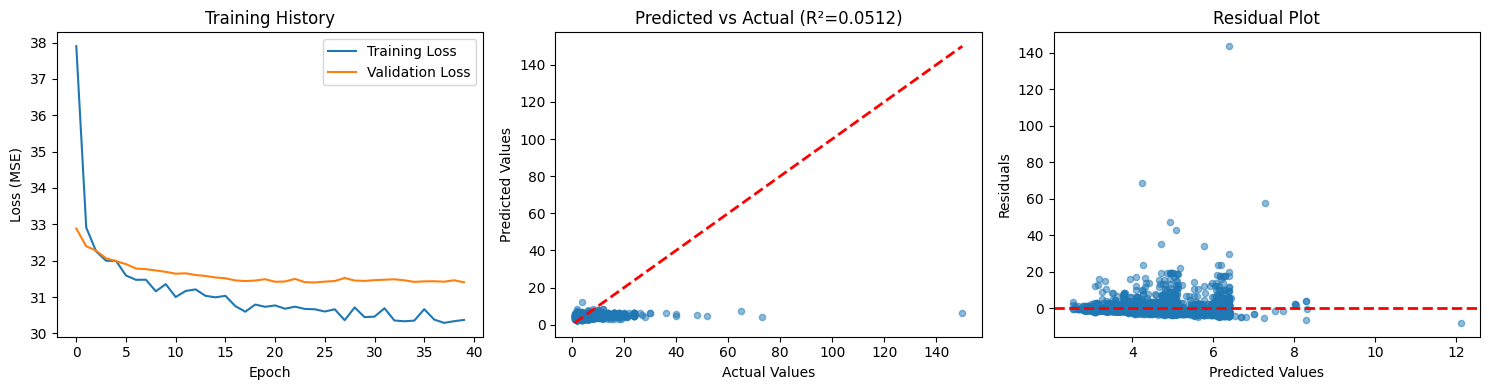

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Training history
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Training History')
axes[0].legend()

# Predicted vs Actual
axes[1].scatter(y_test, y_pred_nn, alpha=0.5, s=20)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title(f'Predicted vs Actual (R²={r2_nn:.4f})')

# Residuals
residuals_nn = y_test - y_pred_nn
axes[2].scatter(y_pred_nn, residuals_nn, alpha=0.5, s=20)
axes[2].axhline(y=0, color='r', linestyle='--', lw=2)
axes[2].set_xlabel('Predicted Values')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residual Plot')

plt.tight_layout()
plt.show()

# Task 3: Build Primary Machine Learning Models

## 3.1 Data Preparation for Classical ML Models

In [18]:
# Use the same features and target as neural network for fair comparison
X_ml = X.copy()
y_ml = y.copy()

# Split data (same split as neural network)
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X_ml, y_ml, test_size=0.2, random_state=42, shuffle=True
)

print(f"Training set: {X_train_ml.shape[0]:,} samples")
print(f"Testing set: {X_test_ml.shape[0]:,} samples")
print(f"Features: {X_train_ml.shape[1]}")


Training set: 9,098 samples
Testing set: 2,275 samples
Features: 7


## 3.2 Model 1: Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Build Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_model.fit(X_train_ml, y_train_ml)

# Make predictions
y_pred_rf = rf_model.predict(X_test_ml)

# Evaluate
mse_rf = mean_squared_error(y_test_ml, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_ml, y_pred_rf)
r2_rf = r2_score(y_test_ml, y_pred_rf)

print("Random Forest Regressor Results:")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")


Random Forest Regressor Results:
MSE: 32.5454
RMSE: 5.7049
MAE: 2.6558
R-squared: -0.0497


## 3.3 Model 2: Gradient Boosting Regressor

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Build Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_ml, y_train_ml)

# Make predictions
y_pred_gb = gb_model.predict(X_test_ml)

# Evaluate
mse_gb = mean_squared_error(y_test_ml, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test_ml, y_pred_gb)
r2_gb = r2_score(y_test_ml, y_pred_gb)

print("Gradient Boosting Regressor Results:")
print(f"MSE: {mse_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")
print(f"R-squared: {r2_gb:.4f}")

Gradient Boosting Regressor Results:
MSE: 29.2197
RMSE: 5.4055
MAE: 2.5695
R-squared: 0.0576


In [21]:
# Create comparison dataframe
initial_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'MSE': [mse_rf, mse_gb],
    'RMSE': [rmse_rf, rmse_gb],
    'MAE': [mae_rf, mae_gb],
    'R-squared': [r2_rf, r2_gb]
})

print("\nInitial Model Comparison:")
print(initial_comparison.to_string(index=False))

print(f"\nBetter initial model: {initial_comparison.loc[initial_comparison['R-squared'].idxmax(), 'Model']}")



Initial Model Comparison:
            Model       MSE     RMSE      MAE  R-squared
    Random Forest 32.545434 5.704861 2.655798  -0.049675
Gradient Boosting 29.219699 5.405525 2.569528   0.057589

Better initial model: Gradient Boosting


# Task 4: Hyperparameter Optimization with Cross-Validation

In [22]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Random Forest Hyperparameter Grid:")
for param, values in rf_param_grid.items():
    print(f"{param}: {values}")

# Perform grid search
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("\nPerforming Grid Search for Random Forest...")
rf_grid.fit(X_train_ml, y_train_ml)

print(f"\nBest Random Forest Parameters:")
for param, value in rf_grid.best_params_.items():
    print(f"{param}: {value}")
print(f"\nBest CV R-squared Score: {rf_grid.best_score_:.4f}")


Random Forest Hyperparameter Grid:
n_estimators: [100, 200, 300]
max_depth: [10, 20, 30]
min_samples_split: [2, 5, 10]
min_samples_leaf: [1, 2, 4]

Performing Grid Search for Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Random Forest Parameters:
max_depth: 10
min_samples_leaf: 4
min_samples_split: 10
n_estimators: 300

Best CV R-squared Score: 0.0590


## 4.2 Gradient Boosting Hyperparameter Tuning

In [23]:
# Define parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

print("Gradient Boosting Hyperparameter Grid:")
for param, values in gb_param_grid.items():
    print(f"{param}: {values}")

# Perform grid search
gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("\nPerforming Grid Search for Gradient Boosting...")
gb_grid.fit(X_train_ml, y_train_ml)

print(f"\nBest Gradient Boosting Parameters:")
for param, value in gb_grid.best_params_.items():
    print(f"{param}: {value}")
print(f"\nBest CV R-squared Score: {gb_grid.best_score_:.4f}")


Gradient Boosting Hyperparameter Grid:
n_estimators: [100, 200, 300]
learning_rate: [0.01, 0.1, 0.2]
max_depth: [3, 5, 7]
min_samples_split: [2, 5, 10]

Performing Grid Search for Gradient Boosting...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Gradient Boosting Parameters:
learning_rate: 0.01
max_depth: 5
min_samples_split: 2
n_estimators: 200

Best CV R-squared Score: 0.0504


## 4.3 Summary of Hyperparameter Tuning

In [24]:
# Summary table
tuning_summary = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Best CV R-squared': [rf_grid.best_score_, gb_grid.best_score_]
})

print("\nHyperparameter Tuning Summary:")
print(tuning_summary.to_string(index=False))


Hyperparameter Tuning Summary:
            Model  Best CV R-squared
    Random Forest           0.058990
Gradient Boosting           0.050357


# Task 5: Feature Selection

In [25]:
from sklearn.feature_selection import RFE

# Feature selection for Random Forest using RFE
print("Performing Feature Selection using RFE with Random Forest...")
rfe_rf = RFE(
    estimator=RandomForestRegressor(**rf_grid.best_params_, random_state=42, n_jobs=-1),
    n_features_to_select=8,
    step=1
)
rfe_rf.fit(X_train_ml, y_train_ml)

# Get selected features
selected_features_rf = X_train_ml.columns[rfe_rf.support_].tolist()
print(f"\nSelected features for Random Forest ({len(selected_features_rf)}):")
for i, feat in enumerate(selected_features_rf, 1):
    print(f"{i}. {feat}")

# %%
# Feature selection for Gradient Boosting using RFE
print("Performing Feature Selection using RFE with Gradient Boosting...")
rfe_gb = RFE(
    estimator=GradientBoostingRegressor(**gb_grid.best_params_, random_state=42),
    n_features_to_select=8,
    step=1
)
rfe_gb.fit(X_train_ml, y_train_ml)

# Get selected features
selected_features_gb = X_train_ml.columns[rfe_gb.support_].tolist()
print(f"\nSelected features for Gradient Boosting ({len(selected_features_gb)}):")
for i, feat in enumerate(selected_features_gb, 1):
    print(f"{i}. {feat}")


Performing Feature Selection using RFE with Random Forest...


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=8 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(



Selected features for Random Forest (7):
1. Latitude_clean
2. Longitude_clean
3. State_encoded
4. Status_encoded
5. Access_encoded
6. Owner_encoded
7. Fuel_ELEC
Performing Feature Selection using RFE with Gradient Boosting...


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=8 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(



Selected features for Gradient Boosting (7):
1. Latitude_clean
2. Longitude_clean
3. State_encoded
4. Status_encoded
5. Access_encoded
6. Owner_encoded
7. Fuel_ELEC


# 5.2 Justification for Feature Selection

Recursive Feature Elimination (RFE) was chosen because:

1. It works well with ensemble methods like Random Forest and Gradient Boosting
2. It recursively removes the least important features based on model performance
3. It considers feature interactions, not just individual feature importance
4. It provides model-specific feature selection, optimizing each model separately

The selection of 8 features balances model complexity and performance, reducing overfitting risk while maintaining predictive power.

# Task 6: Final Models and Comparative Analysis

In [26]:
# Prepare data with selected features
X_train_rf_final = X_train_ml[selected_features_rf]
X_test_rf_final = X_test_ml[selected_features_rf]

# Build final Random Forest model with best parameters and selected features
rf_final = RandomForestRegressor(**rf_grid.best_params_, random_state=42, n_jobs=-1)
rf_final.fit(X_train_rf_final, y_train_ml)

# Predictions
y_pred_rf_final = rf_final.predict(X_test_rf_final)

# Evaluate
mse_rf_final = mean_squared_error(y_test_ml, y_pred_rf_final)
rmse_rf_final = np.sqrt(mse_rf_final)
mae_rf_final = mean_absolute_error(y_test_ml, y_pred_rf_final)
r2_rf_final = r2_score(y_test_ml, y_pred_rf_final)

print("Final Random Forest Model Performance:")
print(f"MSE: {mse_rf_final:.4f}")
print(f"RMSE: {rmse_rf_final:.4f}")
print(f"MAE: {mae_rf_final:.4f}")
print(f"R-squared: {r2_rf_final:.4f}")

Final Random Forest Model Performance:
MSE: 27.8610
RMSE: 5.2783
MAE: 2.5286
R-squared: 0.1014


In [27]:
# Prepare data with selected features
X_train_gb_final = X_train_ml[selected_features_gb]
X_test_gb_final = X_test_ml[selected_features_gb]

# Build final Gradient Boosting model with best parameters and selected features
gb_final = GradientBoostingRegressor(**gb_grid.best_params_, random_state=42)
gb_final.fit(X_train_gb_final, y_train_ml)

# Predictions
y_pred_gb_final = gb_final.predict(X_test_gb_final)

# Evaluate
mse_gb_final = mean_squared_error(y_test_ml, y_pred_gb_final)
rmse_gb_final = np.sqrt(mse_gb_final)
mae_gb_final = mean_absolute_error(y_test_ml, y_pred_gb_final)
r2_gb_final = r2_score(y_test_ml, y_pred_gb_final)

print("Final Gradient Boosting Model Performance:")
print(f"MSE: {mse_gb_final:.4f}")
print(f"RMSE: {rmse_gb_final:.4f}")
print(f"MAE: {mae_gb_final:.4f}")
print(f"R-squared: {r2_gb_final:.4f}")

Final Gradient Boosting Model Performance:
MSE: 28.8943
RMSE: 5.3753
MAE: 2.6003
R-squared: 0.0681


## 6.3 Comparative Analysis of Final Models

In [28]:
# Create comprehensive comparison table
final_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Features Used': [len(selected_features_rf), len(selected_features_gb)],
    'CV Score': [rf_grid.best_score_, gb_grid.best_score_],
    'Test RMSE': [rmse_rf_final, rmse_gb_final],
    'Test R-squared': [r2_rf_final, r2_gb_final],
    'Test MAE': [mae_rf_final, mae_gb_final]
})

print("\nFinal Model Comparison:")
print(final_comparison.to_string(index=False))

# Identify best model
best_model_idx = final_comparison['Test R-squared'].idxmax()
best_model_name = final_comparison.loc[best_model_idx, 'Model']
print(f"\nBest performing model: {best_model_name}")
print(f"R-squared: {final_comparison.loc[best_model_idx, 'Test R-squared']:.4f}")



Final Model Comparison:
            Model  Features Used  CV Score  Test RMSE  Test R-squared  Test MAE
    Random Forest              7  0.058990   5.278349        0.101412  2.528584
Gradient Boosting              7  0.050357   5.375337        0.068086  2.600270

Best performing model: Random Forest
R-squared: 0.1014


## 6.4 Visualization of Final Models

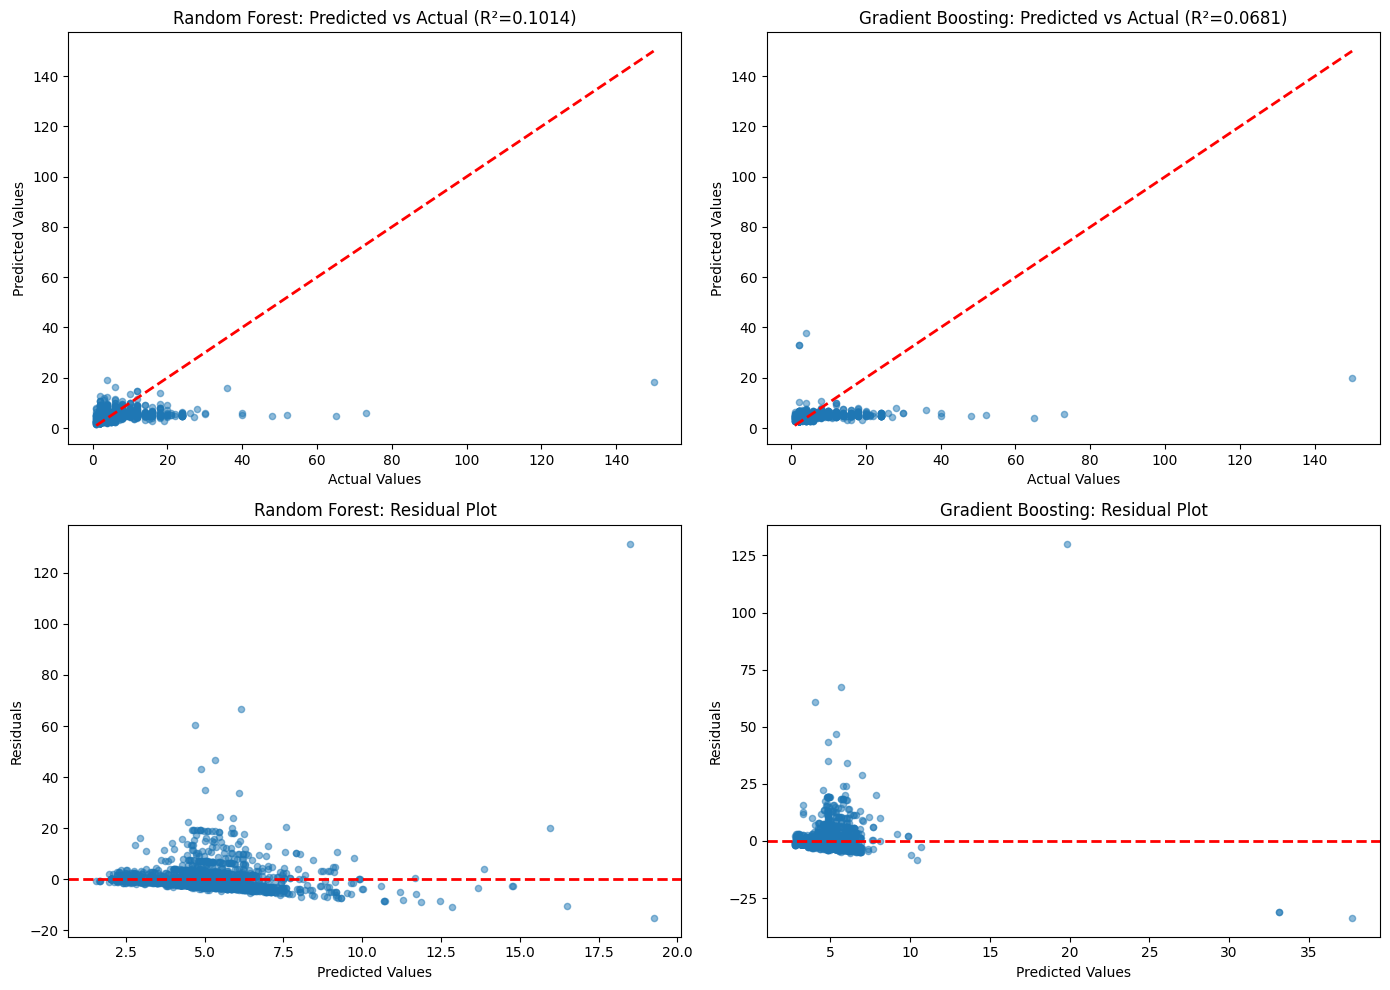

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Random Forest: Predicted vs Actual
axes[0, 0].scatter(y_test_ml, y_pred_rf_final, alpha=0.5, s=20)
axes[0, 0].plot([y_test_ml.min(), y_test_ml.max()],
                [y_test_ml.min(), y_test_ml.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title(f'Random Forest: Predicted vs Actual (R²={r2_rf_final:.4f})')

# Gradient Boosting: Predicted vs Actual
axes[0, 1].scatter(y_test_ml, y_pred_gb_final, alpha=0.5, s=20)
axes[0, 1].plot([y_test_ml.min(), y_test_ml.max()],
                [y_test_ml.min(), y_test_ml.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].set_title(f'Gradient Boosting: Predicted vs Actual (R²={r2_gb_final:.4f})')

# Random Forest: Residuals
residuals_rf = y_test_ml - y_pred_rf_final
axes[1, 0].scatter(y_pred_rf_final, residuals_rf, alpha=0.5, s=20)
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Random Forest: Residual Plot')

# Gradient Boosting: Residuals
residuals_gb = y_test_ml - y_pred_gb_final
axes[1, 1].scatter(y_pred_gb_final, residuals_gb, alpha=0.5, s=20)
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Gradient Boosting: Residual Plot')

plt.tight_layout()
plt.show()

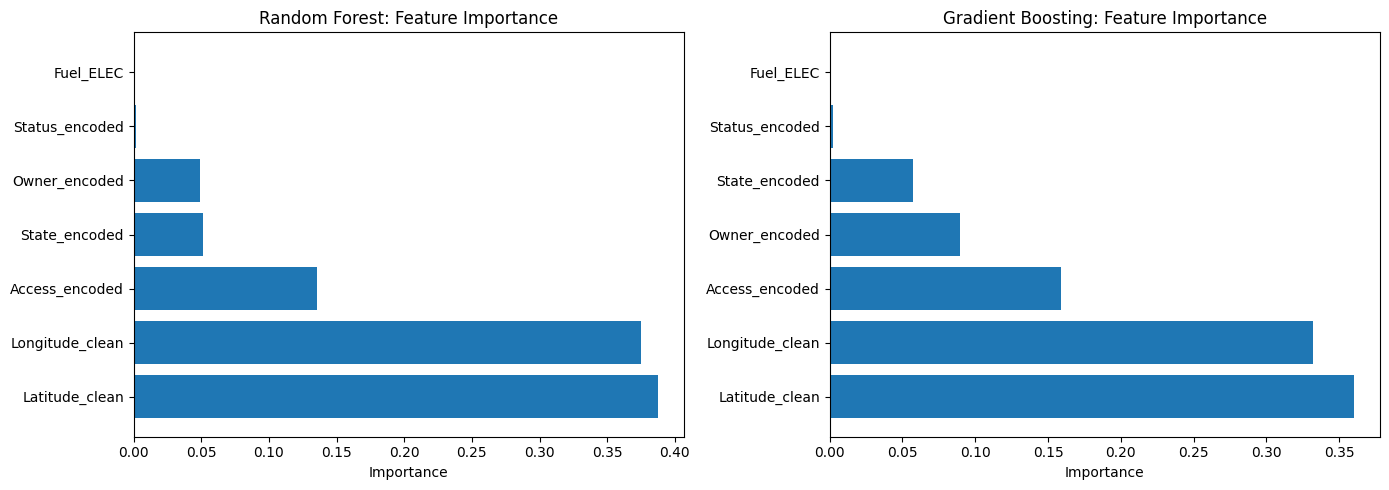


Random Forest - Top 5 Important Features:
        Feature  Importance
 Latitude_clean    0.387316
Longitude_clean    0.374747
 Access_encoded    0.135587
  State_encoded    0.051227
  Owner_encoded    0.049205

Gradient Boosting - Top 5 Important Features:
        Feature  Importance
 Latitude_clean    0.360068
Longitude_clean    0.332114
 Access_encoded    0.158649
  Owner_encoded    0.089721
  State_encoded    0.057451


In [30]:
# Random Forest feature importance
rf_importance = pd.DataFrame({
    'Feature': selected_features_rf,
    'Importance': rf_final.feature_importances_
}).sort_values('Importance', ascending=False)

# Gradient Boosting feature importance
gb_importance = pd.DataFrame({
    'Feature': selected_features_gb,
    'Importance': gb_final.feature_importances_
}).sort_values('Importance', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest importance
axes[0].barh(range(len(rf_importance)), rf_importance['Importance'])
axes[0].set_yticks(range(len(rf_importance)))
axes[0].set_yticklabels(rf_importance['Feature'])
axes[0].set_xlabel('Importance')
axes[0].set_title('Random Forest: Feature Importance')

# Gradient Boosting importance
axes[1].barh(range(len(gb_importance)), gb_importance['Importance'])
axes[1].set_yticks(range(len(gb_importance)))
axes[1].set_yticklabels(gb_importance['Feature'])
axes[1].set_xlabel('Importance')
axes[1].set_title('Gradient Boosting: Feature Importance')

plt.tight_layout()
plt.show()

print("\nRandom Forest - Top 5 Important Features:")
print(rf_importance.head().to_string(index=False))

print("\nGradient Boosting - Top 5 Important Features:")
print(gb_importance.head().to_string(index=False))
